<a href="https://colab.research.google.com/github/luigitercero/dogandcatclasification/blob/main/Actividad_2_master_IA_SCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2: Reconocimiento de imagenes más complejas utilizando redes neuronales convolucionales.

En esta actividad se llevará el reconocimiento de imagenes al siguiente nivel, reconociendo imágenes reales de Gatos y Perros para clasificar una imagen entrante como una u otra. En particular, algunos dataset como el reconocimiento de la escritura a mano agilizará el proceso al hacer que todas las imágenes tengan el mismo tamaño y forma, y todas fueran monocromo. Las imágenes del mundo real no son así... tienen diferentes formas, proporciones de aspecto, etc., ¡y normalmente son en color!

Así que, como parte de la tarea necesaria para el proceso de los datos... no es menos importante redimensionarlos para que tengan una forma uniforme.

Para completar esta actividad, se deben realizar los siguientes pasos:

1. Explorar los datos de ejemplo de gatos y perros
2. Preprocesar los datos
3. Construir y entrenar una red neuronal para reconocer la diferencia entre los dos
4. Evaluar la precisión del entrenamiento y la validación


# 1. Exploración de los datos

Comenzar descargando los datos de ejemplo, un .zip de 2.000 fotos JPG de gatos y perros, y extrayéndolo localmente en /tmp.

In [ ]:
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7f62642dfcd0>)

El siguiente código en Python utiliza la biblioteca del OS para usar las bibliotecas del sistema operativo, proporcionando acceso al sistema de archivos, y la biblioteca de archivos zip, que permite descomprimir los datos.

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

A continuación se definen los directorios a utilizar para entrenar esta red neuronal

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Se observan los nombres de los archivos en los directorios de los entrenamientos de perros y gatos (las convenciones de nombres de archivos son las mismas en el directorio de validación):

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


['cat.284.jpg', 'cat.366.jpg', 'cat.915.jpg', 'cat.374.jpg', 'cat.862.jpg', 'cat.143.jpg', 'cat.152.jpg', 'cat.670.jpg', 'cat.105.jpg', 'cat.591.jpg']
['dog.832.jpg', 'dog.908.jpg', 'dog.254.jpg', 'dog.53.jpg', 'dog.318.jpg', 'dog.667.jpg', 'dog.741.jpg', 'dog.117.jpg', 'dog.527.jpg', 'dog.59.jpg']


Se descubre el número total de imágenes de gatos y perros en los directorios de trenes y validación:

In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Se diseñará ahora una CNN para la clasificación de un problema binario (perros y gatos):

**Ejercicio 1 ( 5 puntos)**: Diseñar una red neuroanl convolucional para clasificar las imagenes de perros y gatos. Evaluar los requisitos de la red neuronal que se pide y construirla completando los parametros necesarios para que las capas de la red neuronal sean optimas para la tarea de clasificar los perros y gatos.


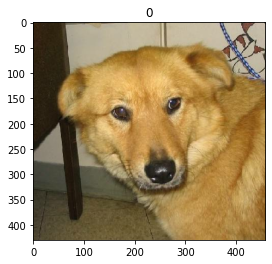



TensorFlow version: 2.8.0
Modelo propuesto de Red Neuronal creado.


In [ ]:
import tensorflow as tf
# tu código para la red neuronal del ejercicio 1 aquí
import os
import matplotlib.pyplot as plt
from PIL import Image

def carga(f, etiqueta):
    # carga the file into tensor
    imagen = tf.io.read_file(f)
    # Decode it to JPEG format
    imagen = tf.image.decode_jpeg(imagen)
    # Convert it to tf.float32
    imagen = tf.cast(imagen, tf.float32)
    
    return imagen, etiqueta
	
	
imagen, etiqueta = carga('/tmp/cats_and_dogs_filtered/train/dogs/dog.209.jpg', 0)

fig, ax = plt.subplots()
ax.imshow(imagen /255.)
ax.set_title(etiqueta)
plt.show()


print("\n\nTensorFlow version: " + tf.__version__)
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=[150,150,3]),
                    MaxPooling2D(2,2),
                    Conv2D(32, (3,3), activation='relu' ),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu' ),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='softmax')
])

print("Modelo propuesto 1 de Red Neuronal creado.")

Se comprueba el modelo:

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 flatten_29 (Flatten)        (None, 73984)           

**Ejercicio 2 (1 punto)**: A continuación habrá que compilar el modelo, para ello usar el optimizador RMSprop, para el loss. Se debe tener en cuenta los elementos a  clasificar, en este caso perros y gatos (un clasificador binario). Como métrica mostrar la precisión.

In [ ]:
# tu código para la compilación del ejercicio 2 aquí
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), # 0.001 < 0.005 
              #optimizer='adam',
              #optimizer='sdg',
              loss="binary_crossentropy",
              metrics = ["accuracy"]
              ) 


# 2. Preprocesamiento de los datos

Una buena practica cuando se trate de clasificar imagenes, es pretratar los datos (imagenes) para mejorar la precisión de la CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Construcción del modelo, entreno y validación.

**Ejercicio 3 (1 puntos)**: Para concluir la creación de la CNN para la clasificación de perros y gatos, falta entrenar la red neuronal. Para ello escribir, crear la variable "history" y guardar en esa variable el modelo entrenado de la CNN. Para el entrenamiento, se deberán definir los "step_per_epoch", el número de "epochs", el número de "validation_steps" y usar "verbose=2".

In [ ]:
# tu código para la variable history que guarda el entrenamiento de la CNN del ejercicio 3 aquí

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2)

'''
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=10,
                    epochs=2,
                    validation_steps=10,
                    verbose=2)
'''

Epoch 1/4
100/100 - 11s - loss: 0.1635 - accuracy: 0.5000 - val_loss: 0.9472 - val_accuracy: 0.5000 - 11s/epoch - 114ms/step
Epoch 2/4
100/100 - 11s - loss: 0.1444 - accuracy: 0.5000 - val_loss: 1.1780 - val_accuracy: 0.5000 - 11s/epoch - 107ms/step
Epoch 3/4
100/100 - 11s - loss: 0.1406 - accuracy: 0.5000 - val_loss: 1.0417 - val_accuracy: 0.5000 - 11s/epoch - 106ms/step
Epoch 4/4
100/100 - 11s - loss: 0.1227 - accuracy: 0.5000 - val_loss: 1.0512 - val_accuracy: 0.5000 - 11s/epoch - 106ms/step


'\nhistory = model.fit(train_generator,\n                    validation_data = validation_generator,\n                    steps_per_epoch=10,\n                    epochs=2,\n                    validation_steps=10,\n                    verbose=2)\n'

# 4. Evaluando la precisión y la perdida del modelo


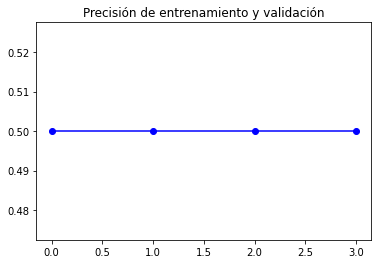

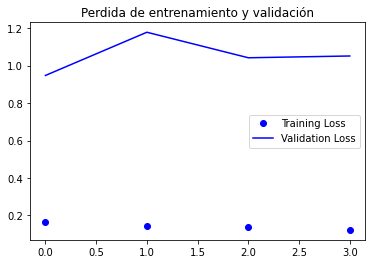

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

Como se puede observar, este es un claro ejemplo de overfitting, algo que naturalmente se quiere evitar para que las redes neuronales sean lo más precisas posibles.

**Ejercicio 4 (3 puntos)**: Para soluciónar este problema, se debe rehacer algunas partes del código anterior utilizando las técnicas de regularización aprendidas en clase, como el data augmentation.

*Consejo*: Volver a escribir otra vez todas las secciones y cambiar el código necesario aplicando las técnicas de regularización elegidas. Se debe recordar que este tipo de técnicas se suele usar en el preprocesamiento de los datos.

*Aclaración*: Se espera que al menos se use una de las técnicas de regularización aprendidas en clase. Se valorará positivamente razonar el motivo del uso de la técnica escogida (o escogidas en el caso de ser varias) y no las otras.

A modo orientativo, se espera obtener un resultado gráfico similar a este:

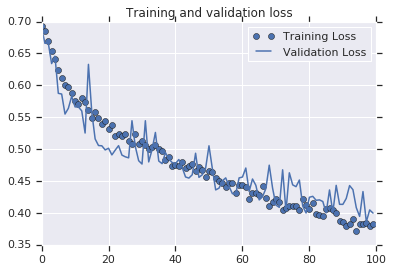
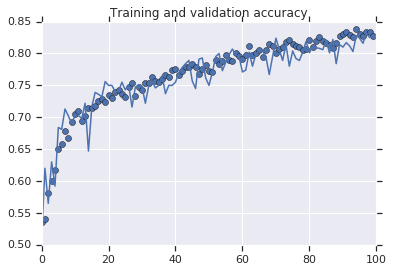

In [ ]:
### Tu código aquí para la reducción del overfitting del ejercicio 4 aquí ###

In [ ]:
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=[150,150,3]),
                    MaxPooling2D(2,2),
                    Conv2D(32, (3,3), activation='relu' ),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu' ),
                    MaxPooling2D(2,2),
                    #Conv2D(128, (3,3), activation='relu' ),
                    #MaxPooling2D(2,2),
                    Flatten(),
                    #Dense(1024, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(1, activation='softmax')
])

print("Modelo propuesto 2 de Red Neuronal creado.")

Modelo propuesto 2 de Red Neuronal creado.


In [ ]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_127 (Conv2D)         (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_128 (Conv2D)         (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_129 (Conv2D)         (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 17, 17, 64)     

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001), # 0.001 < 0.005 
              #optimizer='adam',
              #optimizer='sgd',
              loss="binary_crossentropy",
              metrics = ["accuracy"]
              ) 


In [ ]:
# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2)

Epoch 1/15
100/100 - 13s - loss: 0.9933 - accuracy: 0.5000 - val_loss: 0.6596 - val_accuracy: 0.5000 - 13s/epoch - 130ms/step
Epoch 2/15
100/100 - 10s - loss: 0.6363 - accuracy: 0.5000 - val_loss: 0.5863 - val_accuracy: 0.5000 - 10s/epoch - 104ms/step
Epoch 3/15
100/100 - 10s - loss: 0.5627 - accuracy: 0.5000 - val_loss: 0.6094 - val_accuracy: 0.5000 - 10s/epoch - 103ms/step
Epoch 4/15
100/100 - 10s - loss: 0.4983 - accuracy: 0.5000 - val_loss: 0.5934 - val_accuracy: 0.5000 - 10s/epoch - 103ms/step
Epoch 5/15
100/100 - 10s - loss: 0.4098 - accuracy: 0.5000 - val_loss: 0.7311 - val_accuracy: 0.5000 - 10s/epoch - 103ms/step
Epoch 6/15
100/100 - 10s - loss: 0.3288 - accuracy: 0.5000 - val_loss: 0.6253 - val_accuracy: 0.5000 - 10s/epoch - 105ms/step
Epoch 7/15
100/100 - 10s - loss: 0.2596 - accuracy: 0.5000 - val_loss: 0.7484 - val_accuracy: 0.5000 - 10s/epoch - 104ms/step
Epoch 8/15
100/100 - 10s - loss: 0.1873 - accuracy: 0.5000 - val_loss: 1.0181 - val_accuracy: 0.5000 - 10s/epoch - 103

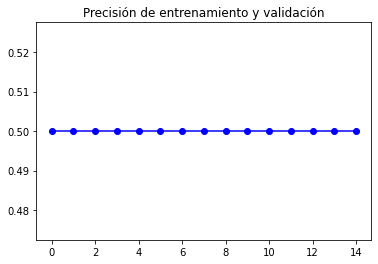

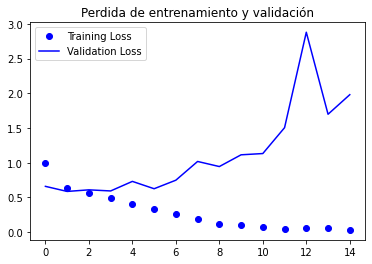

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

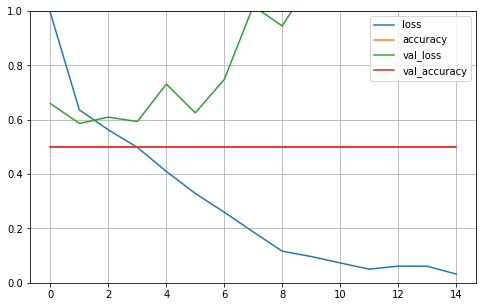

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()